<a href="https://colab.research.google.com/github/shivanibandi110/Sudoku-solver/blob/main/GDSC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#GDSC-DAY-2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images,  test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
train_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


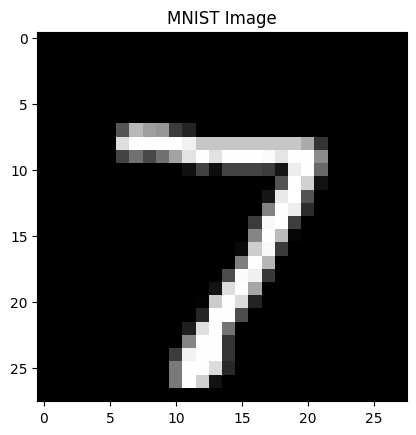

In [ ]:
import matplotlib.pyplot as plt
image = train_images[0]
plt.imshow(image, cmap='gray')
plt.title(f'MNIST Image')
plt.show()

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # usually smaller in size,32 represents the number of fiters. Rulu activates the neuron
model.add(layers.MaxPooling2D((2, 2)))#this is for downscaling

In [ ]:
# Flatten the output before feeding into a dense layer
model.add(layers.Flatten())# output to a 1-D array and feed to a neural network
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#error

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
#eopoch is a training cycle

Epoch 1/5
125/125 [==============================] - 4s 27ms/step - loss: 2.3072 - accuracy: 0.1006 - val_loss: 2.3012 - val_accuracy: 0.1120
Epoch 2/5
125/125 [==============================] - 3s 21ms/step - loss: 2.2919 - accuracy: 0.1248 - val_loss: 2.3080 - val_accuracy: 0.1035
Epoch 3/5
125/125 [==============================] - 3s 21ms/step - loss: 2.2728 - accuracy: 0.1482 - val_loss: 2.3147 - val_accuracy: 0.1025
Epoch 4/5
125/125 [==============================] - 3s 21ms/step - loss: 2.2454 - accuracy: 0.1696 - val_loss: 2.3264 - val_accuracy: 0.1050
Epoch 5/5
125/125 [==============================] - 4s 29ms/step - loss: 2.2154 - accuracy: 0.1914 - val_loss: 2.3436 - val_accuracy: 0.1040


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 129.1015 - accuracy: 0.1313
Test accuracy: 13.13%


In [ ]:
model.save('weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
